In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('Label')
    plt.xlabel('Prediction')

In [3]:

generated=pd.read_csv("../datasets/generated.csv")


In [4]:
generated

,0,1,2,3,label
0,-0.525336,3.623456,1.680293,2.075983,0
1,9.534497,-8.348758,0.112068,6.815969,1
2,8.524880,-7.082612,-0.868522,5.211075,1
3,6.826851,-8.784989,0.090649,4.446359,1
4,-2.591003,5.138362,1.059329,1.319494,0
...,...,...,...,...,...
19995,6.590158,-8.562936,0.964792,5.984862,1
19996,8.715324,-7.847383,-0.415671,6.783874,1
19997,6.547144,-8.264512,-1.492629,5.186666,1
19998,-0.781900,4.160036,5.067404,8.881871,2


In [5]:
y=generated["label"]
x=generated.drop(["label",],axis=1)

In [6]:
x.describe()

,0,1,2,3
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.057691,0.055582,1.629570,5.726769
std,4.040587,5.332695,1.687016,3.509535
min,-4.400123,-11.219695,-4.276724,-2.116425
25%,-1.042873,-6.659021,0.341375,2.004535
50%,-0.020341,3.021220,1.769409,6.388002
75%,6.940277,4.110598,2.907363,8.823314
max,11.044036,7.411504,6.789665,13.484701


In [7]:
x.head()

,0,1,2,3
0,-0.525336,3.623456,1.680293,2.075983
1,9.534497,-8.348758,0.112068,6.815969
2,8.524880,-7.082612,-0.868522,5.211075
3,6.826851,-8.784989,0.090649,4.446359
4,-2.591003,5.138362,1.059329,1.319494


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
from sklearn import preprocessing

temp =x.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp)
x_norm = pd.DataFrame(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)


In [10]:
x_norm.head()

,0,1,2,3
0,0.250890,0.796683,0.538298,0.268725
1,0.902258,0.154093,0.396588,0.572548
2,0.836886,0.222051,0.307978,0.469678
3,0.726940,0.130679,0.394652,0.420661
4,0.117139,0.877993,0.482186,0.220235


In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-2,hidden_layer_sizes=(5),tol=10e-20, random_state=1,verbose=True,max_iter=1000,warm_start=True,batch_size=512)

In [13]:
clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=512, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=1e-19, validation_fraction=0.1, verbose=True,
       warm_start=True)

In [14]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))

Test Accuracy  1.0
Train Accuracy  1.0


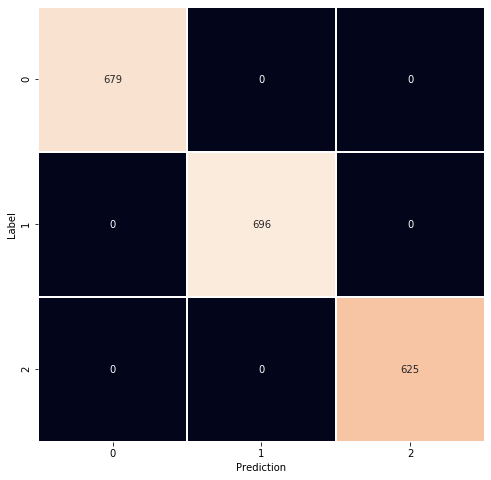

In [17]:
plot_confusion_matrix(y_test,clf.predict(x_test))


In [18]:
from sklearn.svm import SVC 
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [19]:
clf=SVC(kernel='rbf')

In [20]:
clf.fit(x_train,y_train,)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Test Accuracy  1.0
Train Accuracy  1.0


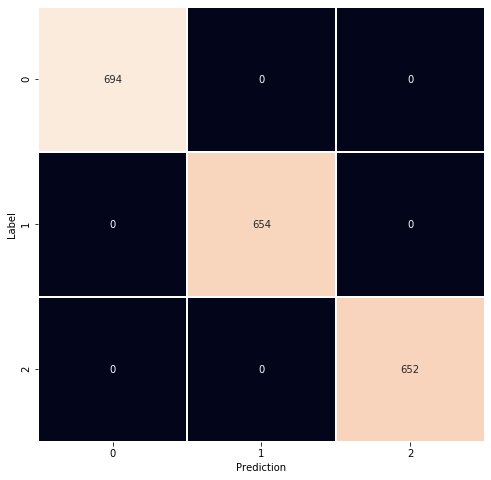

In [22]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))


In [23]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(alpha=0.01,loss="log",verbose=1,max_iter=100)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [25]:
clf.fit(x_train,y_train)

-- Epoch 1
Norm: 4.88, NNZs: 4, Bias: 0.712282, T: 18000, Avg. loss: 0.220890
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 4.87, NNZs: 4, Bias: 0.739455, T: 36000, Avg. loss: 0.219718
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 4.88, NNZs: 4, Bias: 0.733543, T: 54000, Avg. loss: 0.219729
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 4.88, NNZs: 4, Bias: 0.738837, T: 72000, Avg. loss: 0.219635
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 4.88, NNZs: 4, Bias: 0.733738, T: 90000, Avg. loss: 0.219639
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 4.88, NNZs: 4, Bias: 0.720999, T: 108000, Avg. loss: 0.219601
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 4.88, NNZs: 4, Bias: 0.732640, T: 126000, Avg. loss: 0.219622
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 4.88, NNZs: 4, Bias: 0.730934, T: 144000, Avg. loss: 0.219660
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 4.88, NNZs: 4, Bias: 0.728849, T: 162000, Avg. loss: 0.219625
Total training

Norm: 4.88, NNZs: 4, Bias: 0.732901, T: 1548000, Avg. loss: 0.219607
Total training time: 0.61 seconds.
-- Epoch 87
Norm: 4.88, NNZs: 4, Bias: 0.733071, T: 1566000, Avg. loss: 0.219605
Total training time: 0.62 seconds.
-- Epoch 88
Norm: 4.88, NNZs: 4, Bias: 0.732766, T: 1584000, Avg. loss: 0.219615
Total training time: 0.62 seconds.
-- Epoch 89
Norm: 4.88, NNZs: 4, Bias: 0.732618, T: 1602000, Avg. loss: 0.219612
Total training time: 0.62 seconds.
-- Epoch 90
Norm: 4.88, NNZs: 4, Bias: 0.732944, T: 1620000, Avg. loss: 0.219601
Total training time: 0.63 seconds.
-- Epoch 91
Norm: 4.88, NNZs: 4, Bias: 0.732708, T: 1638000, Avg. loss: 0.219615
Total training time: 0.64 seconds.
-- Epoch 92
Norm: 4.88, NNZs: 4, Bias: 0.732657, T: 1656000, Avg. loss: 0.219608
Total training time: 0.64 seconds.
-- Epoch 93
Norm: 4.88, NNZs: 4, Bias: 0.732511, T: 1674000, Avg. loss: 0.219610
Total training time: 0.65 seconds.
-- Epoch 94
Norm: 4.88, NNZs: 4, Bias: 0.732652, T: 1692000, Avg. loss: 0.219604
Tot

Norm: 4.71, NNZs: 4, Bias: 0.302051, T: 1206000, Avg. loss: 0.125933
Total training time: 0.53 seconds.
-- Epoch 68
Norm: 4.71, NNZs: 4, Bias: 0.301937, T: 1224000, Avg. loss: 0.125934
Total training time: 0.54 seconds.
-- Epoch 69
Norm: 4.71, NNZs: 4, Bias: 0.301852, T: 1242000, Avg. loss: 0.125931
Total training time: 0.54 seconds.
-- Epoch 70
Norm: 4.71, NNZs: 4, Bias: 0.301828, T: 1260000, Avg. loss: 0.125931
Total training time: 0.56 seconds.
-- Epoch 71
Norm: 4.71, NNZs: 4, Bias: 0.301711, T: 1278000, Avg. loss: 0.125932
Total training time: 0.57 seconds.
-- Epoch 72
Norm: 4.71, NNZs: 4, Bias: 0.301848, T: 1296000, Avg. loss: 0.125930
Total training time: 0.58 seconds.
-- Epoch 73
Norm: 4.71, NNZs: 4, Bias: 0.301984, T: 1314000, Avg. loss: 0.125930
Total training time: 0.59 seconds.
-- Epoch 74
Norm: 4.71, NNZs: 4, Bias: 0.302150, T: 1332000, Avg. loss: 0.125931
Total training time: 0.60 seconds.
-- Epoch 75
Norm: 4.71, NNZs: 4, Bias: 0.302048, T: 1350000, Avg. loss: 0.125932
Tot

Norm: 4.89, NNZs: 4, Bias: -4.092861, T: 1080000, Avg. loss: 0.240955
Total training time: 0.38 seconds.
-- Epoch 61
Norm: 4.89, NNZs: 4, Bias: -4.093258, T: 1098000, Avg. loss: 0.240985
Total training time: 0.38 seconds.
-- Epoch 62
Norm: 4.89, NNZs: 4, Bias: -4.093741, T: 1116000, Avg. loss: 0.240978
Total training time: 0.39 seconds.
-- Epoch 63
Norm: 4.89, NNZs: 4, Bias: -4.093715, T: 1134000, Avg. loss: 0.241013
Total training time: 0.39 seconds.
-- Epoch 64
Norm: 4.89, NNZs: 4, Bias: -4.093112, T: 1152000, Avg. loss: 0.241056
Total training time: 0.40 seconds.
-- Epoch 65
Norm: 4.89, NNZs: 4, Bias: -4.093408, T: 1170000, Avg. loss: 0.240991
Total training time: 0.40 seconds.
-- Epoch 66
Norm: 4.89, NNZs: 4, Bias: -4.093432, T: 1188000, Avg. loss: 0.241007
Total training time: 0.40 seconds.
-- Epoch 67
Norm: 4.89, NNZs: 4, Bias: -4.094082, T: 1206000, Avg. loss: 0.240957
Total training time: 0.41 seconds.
-- Epoch 68
Norm: 4.89, NNZs: 4, Bias: -4.093782, T: 1224000, Avg. loss: 0.2

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

Test Accuracy  1.0
Train Accuracy  1.0


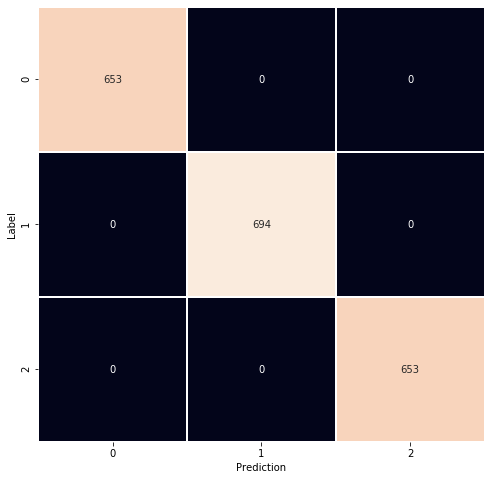

In [26]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))


In [27]:
from sklearn.neighbors import NearestCentroid

In [28]:
clf=NearestCentroid()

In [29]:
clf.fit(x_train,y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

Test Accuracy  1.0
Train Accuracy  1.0


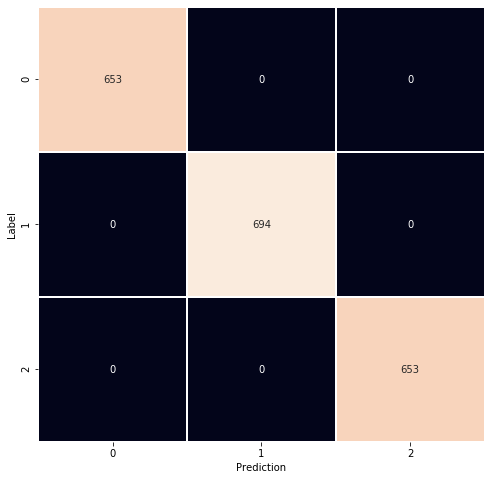

In [30]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))


In [31]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()          

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2)

In [33]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Test Accuracy  1.0
Train Accuracy  1.0


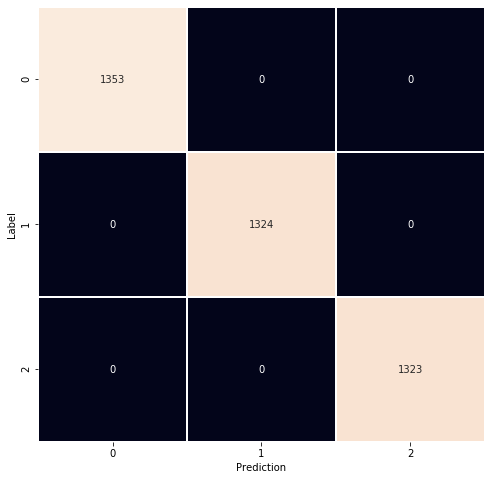

In [34]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))


In [35]:
from xgboost import XGBClassifier 

/home/daniyal/.local/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
clf=XGBClassifier()

In [37]:
clf.fit(x_train, y_train,eval_metric='logloss',verbose=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy  1.0
Train Accuracy  1.0


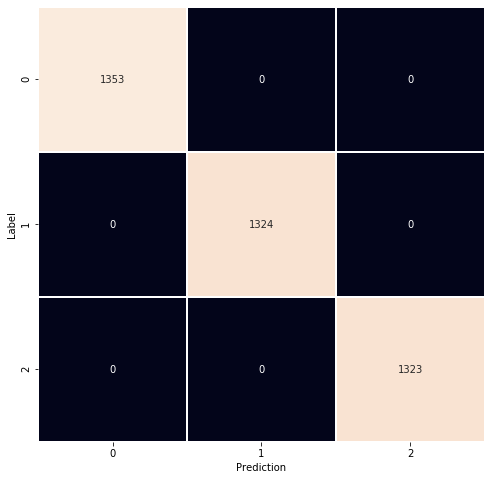

In [38]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
